In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import numpy as np

## 1. Классификация предметов одежды (датасет Fashion MNIST)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
data_path = '/sample_data'
train_dataset = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())


### 1.1 Решить задачу классификации, не используя сверточные слои.
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
valid_ratio = 0.2
num_valid =  int(valid_ratio * len(train_dataset))
num_train = len(train_dataset) - num_valid

train_dataset, valid_dataset = random_split(dataset=train_dataset, lengths=[num_train, num_valid])

In [ ]:
print("The train set contains {} images, in {} batches".format(len(train_loader.dataset), len(train_loader)))
print("The validation set contains {} images, in {} batches".format(len(valid_loader.dataset), len(valid_loader)))
print("The test set contains {} images, in {} batches".format(len(test_loader.dataset), len(test_loader)))

The train set contains 48000 images, in 750 batches
The validation set contains 12000 images, in 188 batches
The test set contains 10000 images, in 157 batches


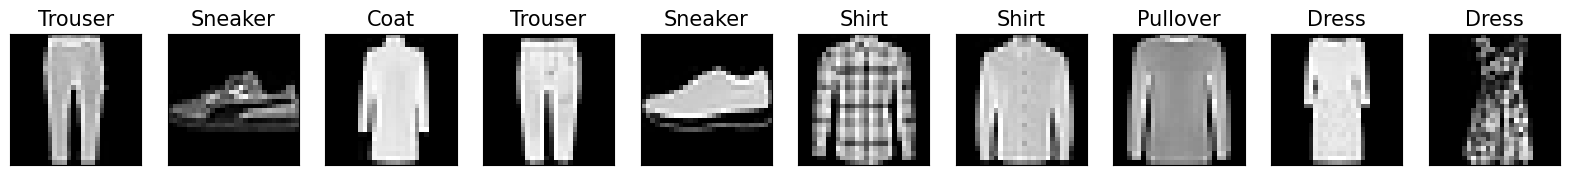

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

nsamples=10
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
imgs, labels = next(iter(train_loader))

fig=plt.figure(figsize=(20,5),facecolor='w')
for i in range(nsamples):
    ax = plt.subplot(1,nsamples, i+1)
    plt.imshow(imgs[i, 0, :, :], vmin=0, vmax=1.0, cmap=cm.gray)
    ax.set_title("{}".format(classes_names[labels[i]]), fontsize=15)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('fashionMNIST_samples.png', bbox_inches='tight')
plt.show()

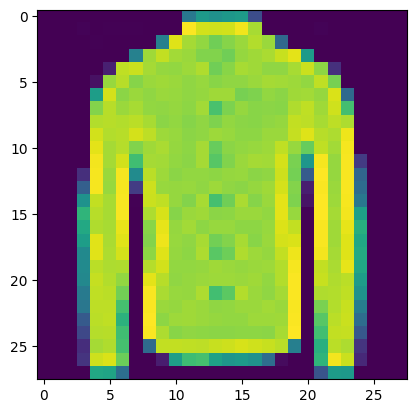

In [ ]:
plt.imshow(train_dataset[11][0][0])

In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size()[0], -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
def train(model, loader, loss_function, optimizer):
    model.train()

    epoch_loss = 0

    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(loader)

In [ ]:
def test(model, loader, loss_function):
    with torch.no_grad():
        model.eval()
        N = 0
        total_loss = 0.0
        correct = 0.0
        for i, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            N += inputs.shape[0]
            loss = loss_function(outputs, targets)
            total_loss += inputs.shape[0] * loss.item()
            predicted_targets = outputs.argmax(dim=1)
            correct += (predicted_targets == targets).sum().item()
        return total_loss / N, correct / N

In [ ]:
input_size = test_dataset.data[0, :].numel()
hidden_size = 512
num_classes = len(test_dataset.classes)
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

In [ ]:
num_epochs = 20
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    train_loss = train(model, loader=train_loader, loss_function=criterion, optimizer=optimizer)
    val_loss, val_acc = test(model=model, loader=valid_loader, loss_function=criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch}')
    print(f'Train Loss {train_loss:.6f} Val Loss {val_loss:.6f} Val Accuracy {val_acc:.6f}')
    print('---')

test_loss, test_acc = test(model=model, loader=test_loader, loss_function=criterion)
print(f'Test Loss {test_loss:.6f} Test Accuracy {test_acc:.6f}')

Epoch 0
Train Loss 0.536546 Val Loss 0.429591 Val Accuracy 0.845333
---
Epoch 1
Train Loss 0.415477 Val Loss 0.442637 Val Accuracy 0.843833
---
Epoch 2
Train Loss 0.387420 Val Loss 0.416965 Val Accuracy 0.848417
---
Epoch 3
Train Loss 0.369219 Val Loss 0.392137 Val Accuracy 0.861917
---
Epoch 4
Train Loss 0.363399 Val Loss 0.398734 Val Accuracy 0.865750
---
Epoch 5
Train Loss 0.355043 Val Loss 0.400320 Val Accuracy 0.868333
---
Epoch 6
Train Loss 0.350842 Val Loss 0.378003 Val Accuracy 0.875417
---
Epoch 7
Train Loss 0.338817 Val Loss 0.404481 Val Accuracy 0.858333
---
Epoch 8
Train Loss 0.328047 Val Loss 0.392650 Val Accuracy 0.862417
---
Epoch 9
Train Loss 0.327547 Val Loss 0.408503 Val Accuracy 0.871333
---
Epoch 10
Train Loss 0.322387 Val Loss 0.394073 Val Accuracy 0.866167
---
Epoch 11
Train Loss 0.315168 Val Loss 0.365663 Val Accuracy 0.875833
---
Epoch 12
Train Loss 0.312052 Val Loss 0.419545 Val Accuracy 0.859833
---
Epoch 13
Train Loss 0.313148 Val Loss 0.394734 Val Accuracy 0

<function matplotlib.pyplot.show(close=None, block=None)>

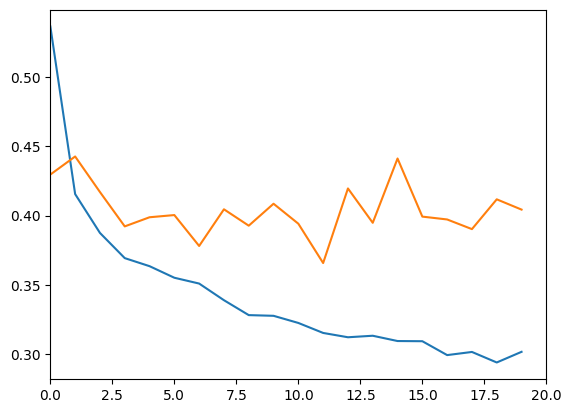

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, num_epochs)
plt.plot(range(len(train_losses)), train_losses)
plt.plot(range(len(val_losses)), val_losses)
plt.show

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.numpy())

    return predictions, true_labels

predictions, true_labels = evaluate_model(model, test_loader)

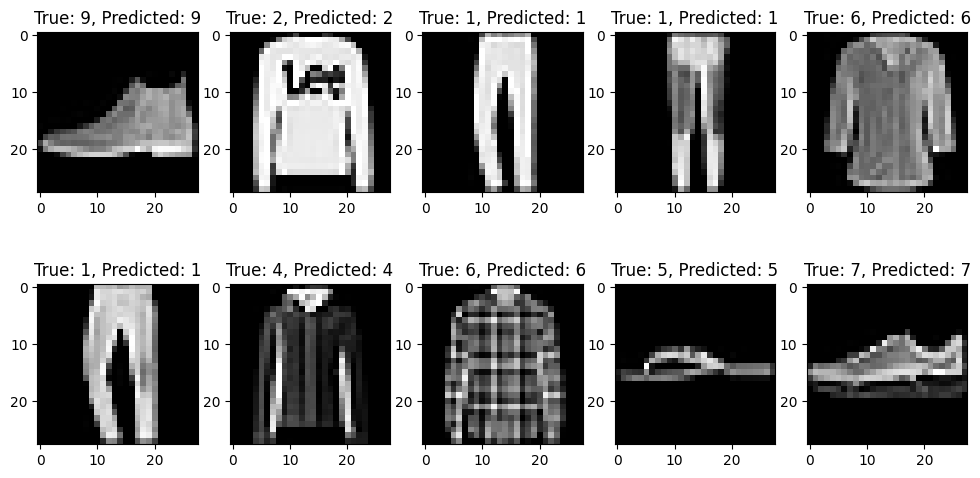

Confusion Matrix:
Accuracy: 86.26%


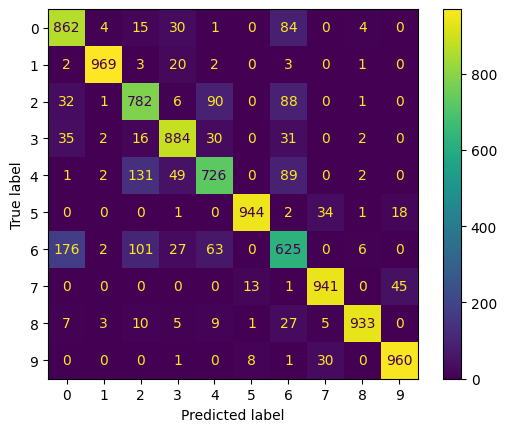

In [ ]:
# Вывод изображений и классов
def show_images(images, labels, predicted_labels):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()

show_images(test_dataset.data[:10], true_labels[:10], predictions[:10])

confusion = ConfusionMatrixDisplay(confusion_matrix(true_labels, predictions))
confusion.plot()
accuracy = accuracy_score(true_labels, predictions)
print('Confusion Matrix:')
print(confusion)
print(f'Accuracy: {accuracy * 100:.2f}%')


torch.save(model.state_dict(), 'fashion_mnist_classifier.pth')

# 1.2 Решить задачу 1.1, используя сверточную нейронную сеть.
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
model = model = nn.Sequential(
    # Слой 1: Свертка -> Batch Normalization -> ReLU
    nn.Conv2d(1, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),

    # Слой 2: Свертка -> Batch Normalization -> ReLU -> Пулинг
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),

    # Слой 3: Свертка -> Batch Normalization -> ReLU -> Пулинг
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),

    # Слой 4: Полносвязный слой -> Batch Normalization -> ReLU
    nn.Flatten(),
    nn.Linear(128 * 7 * 7, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),

    # Слой 5: Выходной полносвязный слой
    nn.Linear(256, 10)
).to(device)

# Выводим архитектуру модели
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=6272, out_features=256, bias=True)
  (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
input_size = test_dataset.data[0, :].numel()
hidden_size = 512
num_classes = len(test_dataset.classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

In [ ]:
num_epochs = 15
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    train_loss = train(model, loader=train_loader, loss_function=criterion, optimizer=optimizer)
    val_loss, val_acc = test(model=model, loader=valid_loader, loss_function=criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch}')
    print(f'Train Loss {train_loss:.6f} Val Loss {val_loss:.6f} Val Accuracy {val_acc:.6f}')
    print('---')
    if epoch>1 and val_losses[-1] > val_losses[-2]:
      break

test_loss, test_acc = test(model=model, loader=test_loader, loss_function=criterion)
print(f'Test Loss {test_loss:.6f} Test Accuracy {test_acc:.6f}')

Epoch 0
Train Loss 0.358729 Val Loss 0.250020 Val Accuracy 0.908500
---
Epoch 1
Train Loss 0.233697 Val Loss 0.216373 Val Accuracy 0.920833
---
Epoch 2
Train Loss 0.190418 Val Loss 0.214369 Val Accuracy 0.924500
---
Epoch 3
Train Loss 0.159872 Val Loss 0.201495 Val Accuracy 0.930583
---
Epoch 4
Train Loss 0.131549 Val Loss 0.224740 Val Accuracy 0.928667
---
Test Loss 0.251654 Test Accuracy 0.923100


<function matplotlib.pyplot.show(close=None, block=None)>

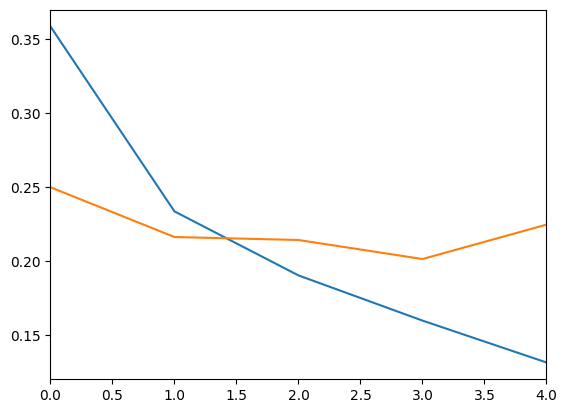

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, len(train_losses)-1)
plt.plot(range(len(train_losses)), train_losses)
plt.plot(range(len(val_losses)), val_losses)
plt.show

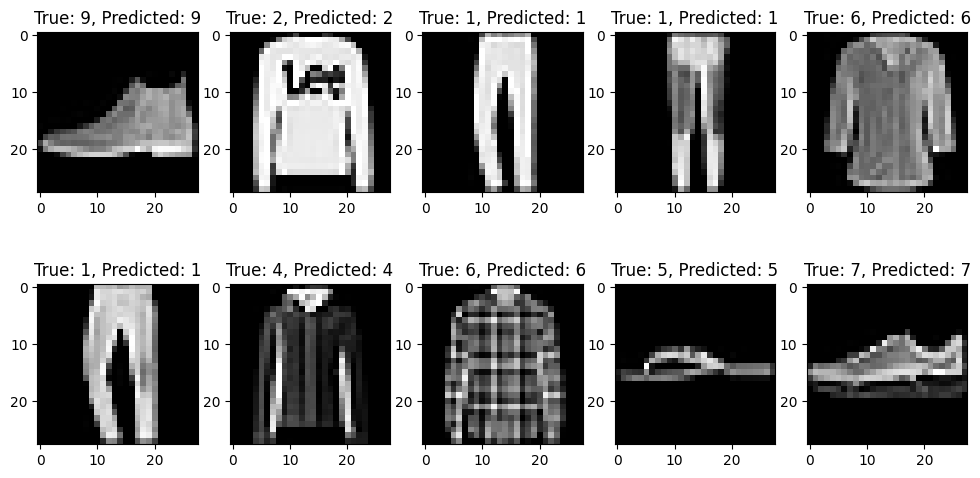

Confusion Matrix:
Accuracy: 92.31%


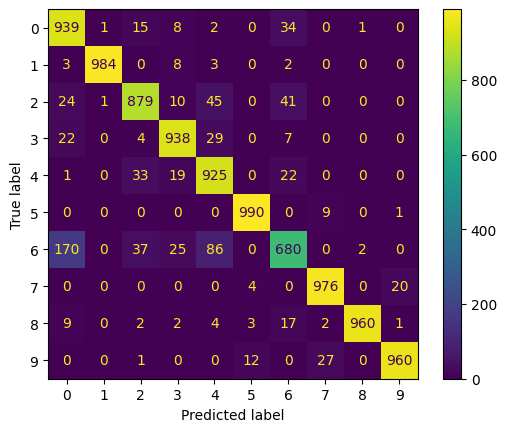

In [ ]:

predictions, true_labels = evaluate_model(model, test_loader)
show_images(test_dataset.data[:10], true_labels[:10], predictions[:10])

# Матрица ошибок и точность
confusion = ConfusionMatrixDisplay(confusion_matrix(true_labels, predictions))
confusion.plot()
accuracy = accuracy_score(true_labels, predictions)
print('Confusion Matrix:')
print(confusion)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Сохранение модели
torch.save(model.state_dict(), 'fashion_mnist_classifier.pth')

##  2. Классификация изображений (датасет CIFAR 10)


### 2.1 Решить задачу классификации, не используя сверточные слои.

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
).to(device)


print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
num_params = sum(p.numel() for p in model.parameters())
print(f"Количество параметров в модели: {num_params}")

Количество параметров в модели: 1707274


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
losses = []

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    losses.append(running_loss)
    print(f"Epoch: {epoch+1} Loss: {running_loss}")

Epoch: 1 Loss: 1278.1101160049438
Epoch: 2 Loss: 1116.062690615654
Epoch: 3 Loss: 1033.5992286801338
Epoch: 4 Loss: 960.8146548867226
Epoch: 5 Loss: 899.2508082985878


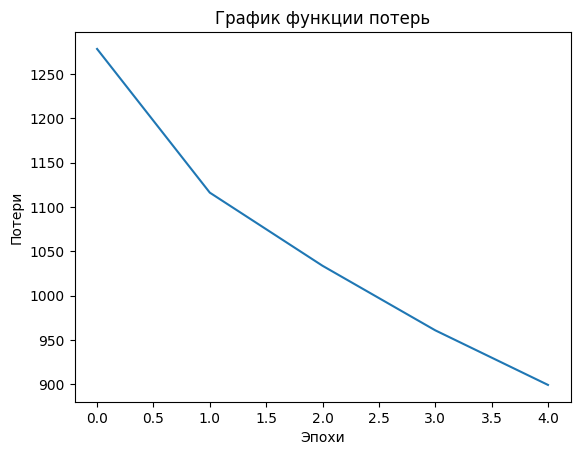

In [ ]:
plt.plot(range(num_epochs), losses)
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.title("График функции потерь")
plt.show()

In [ ]:
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

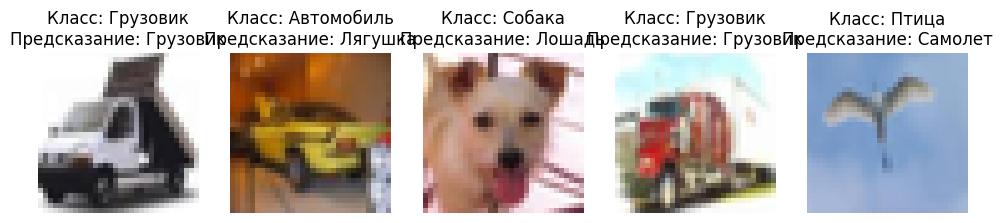

In [ ]:
classes = ('Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик')

num_images_to_show = 5
fig, axs = plt.subplots(1, num_images_to_show, figsize=(12, 3))

for i in range(num_images_to_show):
    idx = np.random.randint(0, len(testset))
    image, label = testset[idx]
    predicted_class = classes[predicted_labels[idx]]
    true_class = classes[label]
    axs[i].imshow((image.numpy().transpose(1, 2, 0) + 1) / 2)  # Денормализация изображения
    axs[i].set_title(f'Класс: {true_class}\nПредсказание: {predicted_class}')
    axs[i].axis('off')

plt.show()

Точность на тестовом множестве: 52.45%
Матрица ошибок:


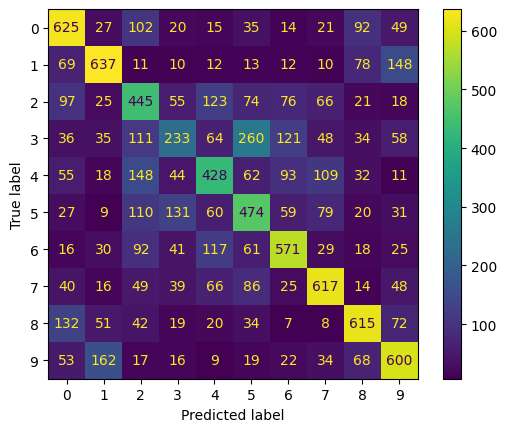

In [ ]:

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Точность на тестовом множестве: {accuracy * 100:.2f}%")

confusion = ConfusionMatrixDisplay(confusion_matrix(true_labels, predicted_labels)).plot()
print("Матрица ошибок:")

torch.save(model.state_dict(), 'cifar10_model.pth')

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть.
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = nn.Sequential(

    nn.Conv2d(3, 64, kernel_size=3, padding=1),  # 3 канала входных данных, 64 фильтра
    nn.ReLU(inplace=True),
    nn.Conv2d(64, 64, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2, 2),  # Максимальное объединение

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(128, 128, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(256, 256, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2, 2),


    nn.Flatten(),  # Преобразование в одномерный тензор
    nn.Linear(256 * 4 * 4, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),

    nn.Linear(512, 10)
).to(device)


print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=4096, out_features=512, bias=True)
  (17): ReLU(inplace=True)
  (18):

In [ ]:
num_params = sum(p.numel() for p in model.parameters())
print(f"Количество параметров в модели: {num_params}")

Количество параметров в модели: 3248202


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 15
losses = []

In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    losses.append(running_loss)
    print(f"Epoch: {epoch+1} Loss: {running_loss}")

Epoch: 1 Loss: 1203.284854710102
Epoch: 2 Loss: 800.0257192254066
Epoch: 3 Loss: 618.9114536345005
Epoch: 4 Loss: 505.60457441210747
Epoch: 5 Loss: 421.74307925999165
Epoch: 6 Loss: 352.52853283286095
Epoch: 7 Loss: 301.2559999078512
Epoch: 8 Loss: 251.0559237897396
Epoch: 9 Loss: 217.20143818110228
Epoch: 10 Loss: 187.368559114635
Epoch: 11 Loss: 168.7187077961862
Epoch: 12 Loss: 162.74412023462355
Epoch: 13 Loss: 145.7535532610491
Epoch: 14 Loss: 141.24501486495137
Epoch: 15 Loss: 128.88626675494015


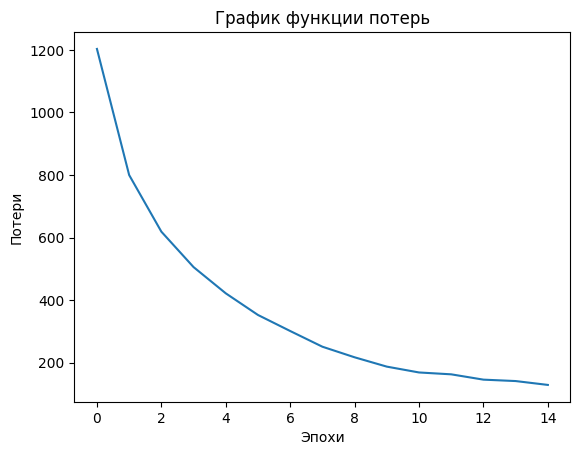

In [ ]:
plt.plot(range(num_epochs), losses)
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.title("График функции потерь")
plt.show()

In [ ]:
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

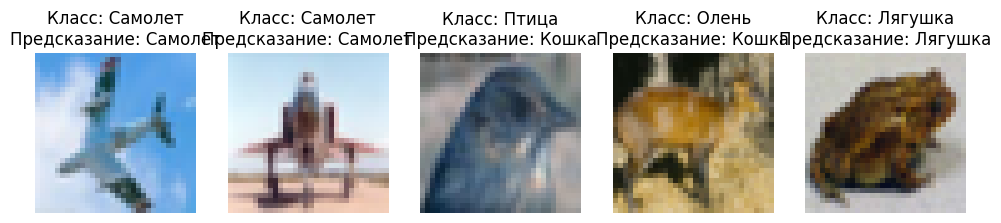

In [ ]:
classes = ('Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик')

num_images_to_show = 5
fig, axs = plt.subplots(1, num_images_to_show, figsize=(12, 3))

for i in range(num_images_to_show):
    idx = np.random.randint(0, len(testset))
    image, label = testset[idx]
    predicted_class = classes[predicted_labels[idx]]
    true_class = classes[label]
    axs[i].imshow((image.numpy().transpose(1, 2, 0) + 1) / 2)  # Денормализация изображения
    axs[i].set_title(f'Класс: {true_class}\nПредсказание: {predicted_class}')
    axs[i].axis('off')

plt.show()

Точность на тестовом множестве: 77.68%
Матрица ошибок:


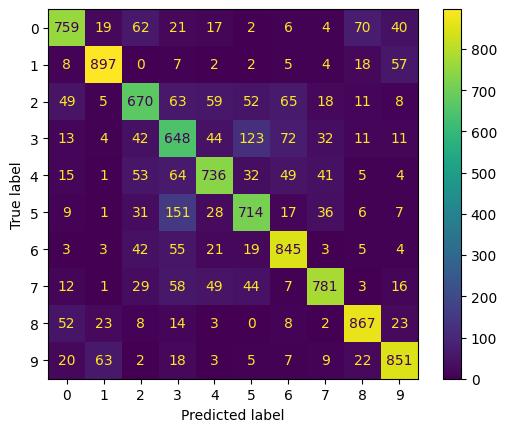

In [ ]:

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Точность на тестовом множестве: {accuracy * 100:.2f}%")

confusion = ConfusionMatrixDisplay(confusion_matrix(true_labels, predicted_labels)).plot()
print("Матрица ошибок:")

torch.save(model.state_dict(), 'cifar10_model.pth')

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
from tqdm import tqdm

zf = zipfile.ZipFile('drive/MyDrive/datasets/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

100%|██████████| 1371/1371 [00:16<00:00, 81.74it/s]


### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью.

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)).
* Вычислить значение accuracy на тестовом множестве.


### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель.
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)